In [26]:
import numpy as np
from numpy.linalg import norm
import scipy.io
import utils.starplus_utils as starp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import ImageGrid
from utils.plotting_utils import montage_array
import time
from utils.general_utils import rescale
import tensor.tensor_product_wrapper as tp
from numpy.random import permutation
from tensor.tensor_train import ttsvd, tt_product

(64, 64, 8)


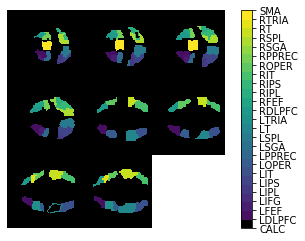

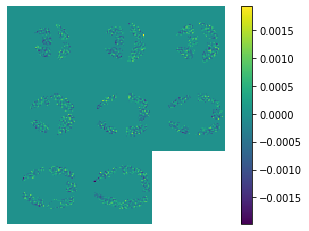

(64, 64, 8, 16, 80)


In [27]:
star_plus_data = scipy.io.loadmat('data-starplus-04847-v7.mat')
roi_tensor, my_color_map, names = starp.visualize_roi(star_plus_data)
print(roi_tensor.shape)

plt.figure(1)
montage_array(roi_tensor, cmap=my_color_map, names=names)
plt.savefig('brain1.jpg')
plt.show()

tensor_PS, labels = starp.get_labels(star_plus_data)

tensor_PS  = tensor_PS / norm(tensor_PS)
# tensor_PS = rescale(tensor_PS, 1, 64)

plt.figure(2)
montage_array(tensor_PS[:, :, :, 0, 0], cmap='viridis')
plt.show()
print(tensor_PS.shape)

In [43]:
print(len(labels[0]))

80


In [36]:
shape_T = tensor_PS.shape
dim_order = permutation(np.arange(len(shape_T)))
tol = 0.5
G, ranks = ttsvd(tensor_PS, tol, dim_order=dim_order, ranks=None)
Ak = tt_product(G, shape_T, dim_order=dim_order)

In [35]:
print(shape_T)
print(len(shape_T))
print(dim_order)

(64, 64, 8, 16, 80)
5
[4 2 0 3 1]


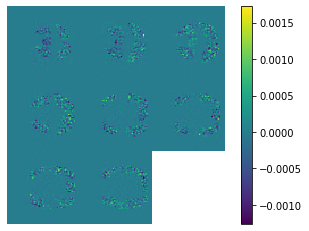

In [32]:
plt.figure(3)
montage_array(Ak[:, :, :, 0, 0], cmap='viridis')
plt.show()

In [37]:
print(shape_T)
print(len(shape_T))
print(dim_order)

(64, 64, 8, 16, 80)
5
[3 4 1 2 0]


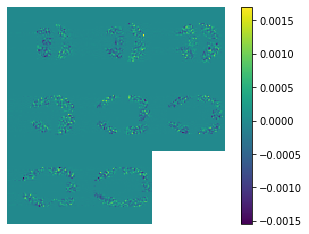

In [38]:
plt.figure(3)
montage_array(Ak[:, :, :, 0, 0], cmap='viridis')
plt.show()